In [1]:
%cd ..
%pwd

/sc/arion/projects/pandeg01a/susmaa01/nona


/sc/arion/projects/pandeg01a/susmaa01/nona/.venv/lib64/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/sc/arion/projects/pandeg01a/susmaa01/nona'

In [3]:
from importlib import reload
import similarity_masks
import ft_cnn
import models

/sc/arion/projects/pandeg01a/susmaa01/nona/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
reload(similarity_masks)
reload(models)
reload(ft_cnn)
%run ft_cnn.py

Training and evaluating models for split 1.
Training nona l2
Epoch: 1
Train: 100%|██████████| 333/333 [03:11<00:00,  1.74it/s]
Train Loss:  2.25402
Epoch: 2
Train:   4%|▍         | 14/333 [00:04<01:40,  3.18it/s]


KeyboardInterrupt: 

In [6]:
sim_norm = torch.tensor([[0.6991, 0.6439, 0.5729, 0.6698, 0.6334, 0.5191, 0.5337, 0.6716, 0.5668,
         0.6030, 0.7801, 0.5692, 0.6101, 0.6530, 0.5995, 0.6190, 0.6205, 0.5232,
         0.4421, 0.5928, 0.4830, 0.5225, 0.4256, 0.7566, 0.5304, 0.5476, 0.5162,
         0.6074, 0.6356, 0.4901, 0.6935, 0.6294, 0.6141, 0.4461, 0.6209, 0.6530,
         0.7430, 0.7339, 0.7866, 0.7405, 0.5469, 0.4842, 0.7254, 0.6139, 0.6939,
         0.7185, 0.6081, 0.6248, 0.5826, 0.5515, 0.4738, 0.5624, 0.5950, 0.5815,
         0.6810, 0.6527, 0.5317, 0.7487, 0.5391, 0.6983, 0.5558, 0.6121, 0.6213,
         0.5881, 0.5261, 0.6053, 0.6133, 0.6489, 0.6661, 0.7448, 0.5815, 0.6753,
         0.6307, 0.5726, 0.6140, 0.5870, 0.6032, 0.5555, 0.5760, 0.5675, 0.5740,
         0.6497, 0.6995, 0.6988, 0.6498, 0.7545, 0.6763, 0.5344, 0.5278, 0.4880,
         0.4272, 0.5175, 0.4825, 0.6120, 0.7120, 0.6528, 0.6204, 0.6095, 0.6175,
         0.5749, 0.4767, 0.6054, 0.4531, 0.9998, 0.5260, 0.5177, 0.5830, 0.5047,
         0.5049, 0.5257, 0.5856, 0.6303, 0.6191, 0.6526, 0.5586, 0.5471, 0.6712,
         0.6325, 0.5010, 0.6272, 0.6903, 0.5191, 0.6756, 0.5135, 0.6180, 0.5684,
         0.6136, 0.5268]])

In [11]:
torch.topk(sim_norm,k=2)

torch.return_types.topk(
values=tensor([[0.9998, 0.7866]]),
indices=tensor([[103,  38]]))

In [7]:
a = 0.7927995324134827
b = 0.8896434903144836
n = 0.44840335845947266
eps = 1e-12

In [8]:
num = torch.abs(sim_norm - a).pow(1 / n).clamp(eps)
denom = num + torch.abs(b - sim_norm).pow(1 / n).clamp(eps)
sim_score = num / denom

In [9]:
torch.nonzero(sim_score==0)

tensor([], size=(0, 2), dtype=torch.int64)

In [10]:
from torch.nn.functional import softmax
sim_score[sim_norm < a] = 0
sim_score[sim_norm > b] = 1
print(sim_score)
sim_score.log()
inf_id = torch.diag(torch.full((len(sim_score),), torch.inf))
sim_score -= inf_id
softmax(sim_score)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])


/tmp/ipykernel_1308185/3459979367.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax(sim_score)


tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan]])

In [73]:
torch.tensor([1e-45]).log()

tensor([-103.2789])

In [112]:
x = torch.rand(5,5)
for i in range(x.shape[1]):
    x[i,i] = 1
a = torch.rand(5).unsqueeze(-1)
print(x) , print(a)
max_a = torch.where(x==1, 0, x).max(dim=1)[0]
new_a = torch.minimum(a, max_a.unsqueeze(-1)) - 1e-4
if not torch.equal(a, new_a):
    print(new_a)

tensor([[1.0000, 0.3779, 0.3087, 0.8797, 0.2590],
        [0.8490, 1.0000, 0.7086, 0.8504, 0.9708],
        [0.0489, 0.3601, 1.0000, 0.1960, 0.0815],
        [0.2912, 0.5581, 0.4912, 1.0000, 0.5003],
        [0.3082, 0.1380, 0.3849, 0.1112, 1.0000]])
tensor([[0.8189],
        [0.8021],
        [0.8947],
        [0.5365],
        [0.5108]])
tensor([[0.8188],
        [0.8020],
        [0.3600],
        [0.5364],
        [0.3848]])


In [113]:
x[x<new_a] = 0
x

tensor([[1.0000, 0.0000, 0.0000, 0.8797, 0.0000],
        [0.8490, 1.0000, 0.0000, 0.8504, 0.9708],
        [0.0000, 0.3601, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.5581, 0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.3849, 0.0000, 1.0000]])

In [114]:
n = 0.3336945176124573
p = torch.abs(x-new_a).pow(1/n)
q = p + torch.abs(x-b).pow(1/n)
p/q

tensor([[9.4999e-01, 4.0406e-01, 4.0406e-01, 6.1045e-01, 4.0406e-01],
        [1.5257e-01, 9.6118e-01, 3.8923e-01, 1.7122e-01, 9.8810e-01],
        [5.4609e-02, 5.4906e-12, 9.9880e-01, 5.4609e-02, 5.4609e-02],
        [1.6026e-01, 1.9693e-04, 1.6026e-01, 9.9686e-01, 1.6026e-01],
        [6.5899e-02, 6.5899e-02, 6.2717e-12, 6.5899e-02, 9.9865e-01]])

In [14]:
x = torch.rand(5,5)
y = -torch.cdist(x,x, p=2)
( y - (2*torch.sqrt(torch.tensor([50]))) ) / (0 - (2*torch.sqrt(torch.tensor([50]))))

tensor([[1.0000, 1.0656, 1.0613, 1.0768, 1.0410],
        [1.0656, 1.0000, 1.0669, 1.0823, 1.0547],
        [1.0613, 1.0669, 1.0000, 1.0659, 1.0540],
        [1.0768, 1.0823, 1.0659, 1.0000, 1.0489],
        [1.0410, 1.0547, 1.0540, 1.0489, 1.0000]])

In [72]:
top_d = 2048
errors = []
for d in tqdm(range(top_d)):
    x = 2 * torch.rand(4000,d) - 1
    sim = torch.cdist(x,x, p=2)
    e = sum(sim.diag()!=0) / len(sim.diag())
    errors.append(e)

100%|██████████| 2048/2048 [08:10<00:00,  4.17it/s]


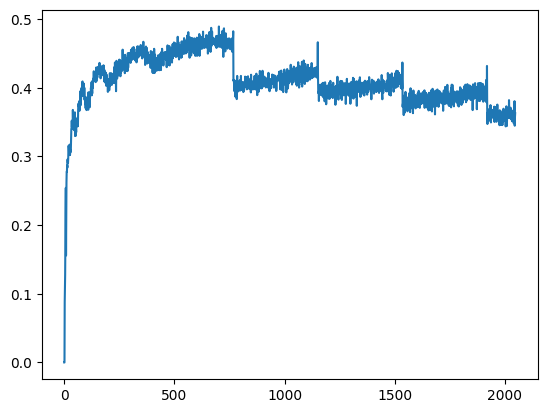

In [78]:
import matplotlib.pyplot as plt

plt.plot(list(range(top_d)), errors)
# for i in range(11):
#     plt.plot([2**i*1.5 for count in range(1000)], [count/2000 for count in range(1000)])
plt.show()

In [60]:
from torch.nn.functional import normalize
x = 2 * torch.rand(50,50) - 1
x_norm = normalize(x, p=2, dim=1)
# x_n_norm = normalize(x_n, p=2, dim=1)
sim = x_norm @ torch.t(x_norm)
sim.min()

tensor(-0.4087)